# Gradient Descent For Linear Regression

The formula for linear regression is:

$$
y = w_1x + w_0
$$

Where $w_1$ is the slope and $w_0$ is the y-intercept.

The cost function for linear regression is:

$$
J(w_1, w_0) = \frac{1}{2m} \sum_{i=1}^{m} (y_i - (w_1x_i + w_0))^2
$$

Where $m$ is the number of data points.

In [7]:
import torch
import matplotlib.pyplot as plt

In [28]:
# 1D tensors for weight and height
weight = torch.tensor([1.4, 2.3, 2.9])
height = torch.tensor([0.5, 1.9, 3.2])

# Add the bias term (a column of ones)
ones = torch.ones(weight.size(0), 1)
x = torch.cat((ones, weight.unsqueeze(1)), 1)
y = height

In [13]:
# Compute closed-form solution
# w = (X^T X)^-1 X^T y

XtX = torch.mm(x.t(), x)  # X^T X
XtX_inv = torch.inverse(XtX)  # (X^T X)^-1
XtY = torch.mm(x.t(), height.unsqueeze(1))  # X^T y
w = torch.mm(XtX_inv, XtY)  # w = (X^T X)^-1 X^T y

# Output the weights (including the bias term)
print(f"Bias: {w[0].item()}, Weight: {w[1].item()}")

Bias: -2.050872802734375, Weight: 1.7806987762451172


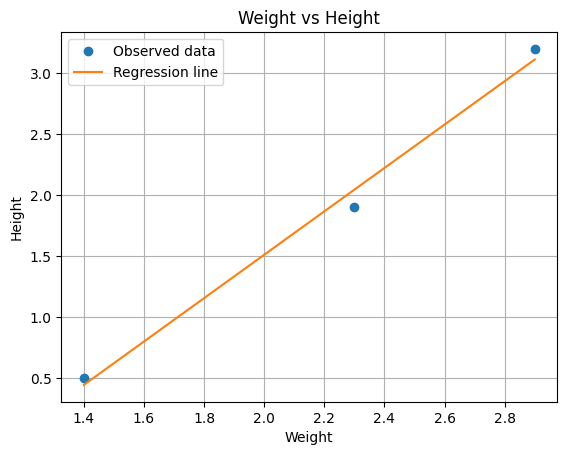

In [14]:
# Plot the data and the linear regression line
plt.plot(weight.numpy(), height.numpy(), "o", label="Observed data")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight vs Height")
plt.grid(True)
plt.plot(weight.numpy(), (w[0] + w[1] * weight).numpy(), label="Regression line")
plt.legend()
plt.show()

# Gradient Descent

The General Gradient Descent Algorithm is:
$$
w := w - alpha * dJ(w)/dw
$$


Where $\alpha$ is the learning rate.

Now for the RSS cost function:
$$
RSS = \sum_{i=1}^{m} (y_i - (w_1x_i + w_0))^2
$$

The chain rule will apploy as follows:
$$
f = g(h(w))
$$

and therefore, the derivative of f with respect to w is:
$$
df/dw = dg/dh * dh/dw
$$

The way this applies to the RSS cost function is:
$$
dRSS/dw = dRSS/dy * dy/dw
$$

So, let's break it down:
dRSS/dy = -2(y - (w_1x + w_0))

dy/dw = -x

Therefore:
$$
dRSS/dw = 2(y - (w_1x + w_0))x = 2 * x.t() * (y - (w_1x + w_0))
$$


In [27]:
# Initialize the model parameters
w = torch.randn(2, 1, requires_grad=False)  # bias, weight
learning_rate = 0.015
num_epochs = 1000

for i in range(num_epochs):
    # Forward pass
    y_pred = torch.mm(x, w)

    # Compute the loss
    loss = torch.mean((height.unsqueeze(1) - y_pred) ** 2)

    # Compute the gradients
    gradient = -2 * x.t().mm(height.unsqueeze(1) - y_pred)

    # Update weights using gradient descent
    with torch.no_grad():  # Temporarily disable gradient tracking
        w -= learning_rate * gradient

    if i % 100 == 0:
        print(f"Iteration {i}: Loss = {loss.item()}")

# Final weights (bias and weight)
print(f"Optimal Bias: {w[0].item()}, Optimal Weight: {w[1].item()}")

Iteration 0: Loss = 30.484472274780273
Iteration 100: Loss = 0.28523123264312744
Iteration 200: Loss = 0.10077396035194397
Iteration 300: Loss = 0.04021453857421875
Iteration 400: Loss = 0.02033221162855625
Iteration 500: Loss = 0.013804624788463116
Iteration 600: Loss = 0.01166156679391861
Iteration 700: Loss = 0.010957942344248295
Iteration 800: Loss = 0.01072696689516306
Iteration 900: Loss = 0.010651089251041412
Optimal Bias: -2.037959098815918, Optimal Weight: 1.775192141532898


# Multi-Layer Perceptron

In [42]:
# Sample data
weight = torch.tensor([1.4, 2.3, 2.9])
height = torch.tensor([0.5, 1.9, 3.2])

# Add bias term
ones = torch.ones(weight.size(0), 1)
x = torch.cat((ones, weight.unsqueeze(1)), 1).float()  # Input features
y = height.unsqueeze(1).float()  # Target values

In [43]:
# Initialize parameters
input_dim = 2  # Including bias
hidden_dim = 10
output_dim = 1

# Initialize weights and biases
w1 = torch.randn(input_dim, hidden_dim, requires_grad=False)
b1 = torch.randn(hidden_dim, requires_grad=False)
w2 = torch.randn(hidden_dim, output_dim, requires_grad=False)
b2 = torch.randn(output_dim, requires_grad=False)

# Learning rate
learning_rate = 0.001

In [44]:
def forward_pass(x):
    # First layer
    z1 = torch.mm(x, w1) + b1
    a1 = torch.relu(z1)  # ReLU activation

    # Second layer
    z2 = torch.mm(a1, w2) + b2
    return z2

Let's break down the gradient computation in your compute_gradients function to clarify why dL_dy_pred is not negative and how the gradients for each layer are calculated.

# 1. Gradient with Respect to Predictions (dL_dy_pred)

```python
dL_dy_pred = 2 * (y_pred - y)
```

Explanation:

The loss function is Mean Squared Error (MSE): 
$$
L = \frac{1}{n} \sum_{i=1}^{n} (y_i - y_{pred_i})^2
$$

To find the gradient of the loss with respect to the predictions, we differentiate the loss function with respect to each prediction $y_{pred_i}$:

$$
\frac{dL}{dy_{pred_i}} = \frac{d}{dy_{pred_i}} \left( \frac{1}{n} \sum_{i=1}^{n} (y_{pred_i} - y_i)^2 \right) = \frac{2}{n} \sum_{i=1}^{n} (y_{pred_i} - y_i)
$$

Since n is a constant, we can ignore it and simplify the gradient to:

$$
\frac{dL}{dy_{pred_i}} = 2(y_{pred_i} - y_i)
$$


# 2. Gradients for the Output Layer
    
```python
dL_dz2 = dL_dy_pred
dL_dw2 = torch.mm(torch.relu(torch.mm(x, w1) + b1).t(), dL_dz2)
dL_db2 = torch.sum(dL_dz2, dim=0)
```

Explanation:

dL_dz2 is the gradient of the loss with respect to z2, which is the input to the output layer. For a linear layer, this is the same as dL_dy_pred.

To compute dL_dw2 (the gradient of the loss with respect to the weights of the output layer), you need to multiply the gradient dL_dz2 with the activations from the hidden layer (a1):

$$
\frac{dL}{dw_2} = a_1^T \cdot \frac{dL}{dz_2}
$$

dL_db2 (the gradient of the loss with respect to the biases of the output layer) is the sum of dL_dz2 along the batch dimension. The reason the gradient is summed (or averaged) across the batch dimension is due to the way gradients accumulate in mini-batch gradient descent. Each sample contributes equally to the loss, so the total gradient for the bias term is the aggregate effect of the loss gradients from all samples in the batch.


$$
\frac{dL}{db_2} = \sum_{i=1}^{n} \frac{dL}{dz_{2_i}}
$$

where n is the batch size.

# 3. Gradients for the Hidden Layer
dL_da1 is the gradient of the loss with respect to the hidden layer activations (a1). This is computed by backpropagating the gradients through the output weights:

$$
\frac{dL}{da_1} = \frac{dL}{dz_2} \cdot w_2^T
$$

dL_dz1 is the gradient of the loss with respect to the linear combination before the activation function in the hidden layer (z1). Since a1 = ReLU(z1), the gradient dL_dz1 is computed by applying the ReLU gradient, which is:

$$
\frac{dL}{dz_1} = \frac{dL}{da_1} \cdot \text{ReLU}'(z1)
$$

where 
ReLU'(z1) = 1 if z1 > 0, else 0.

dL_dw1 (the gradient of the loss with respect to the weights of the first layer) is computed by multiplying dL_dz1 with the input x:

$$
\frac{dL}{dw_1} = x^T \cdot \frac{dL}{dz_1}
$$

dL_db1 (the gradient of the loss with respect to the biases of the first layer) is the sum of dL_dz1 along the batch dimension.

In [45]:
def compute_gradients(x, y, y_pred):
    # Backward pass (manual)
    dL_dy_pred = 2 * (y_pred - y)  # Assuming MSE = (1/N) * sum((y_pred - y)^2)

    # Gradients for the output layer
    dL_dz2 = dL_dy_pred
    dL_dw2 = torch.mm(torch.relu(torch.mm(x, w1) + b1).t(), dL_dz2)
    dL_db2 = torch.sum(dL_dz2, dim=0)

    # Gradients for the hidden layer
    dL_da1 = torch.mm(dL_dz2, w2.t())
    dL_dz1 = dL_da1 * (torch.relu(torch.mm(x, w1) + b1) > 0).float()
    dL_dw1 = torch.mm(x.t(), dL_dz1)
    dL_db1 = torch.sum(dL_dz1, dim=0)

    return dL_dw1, dL_db1, dL_dw2, dL_db2

In [46]:
def update_weights(dL_dw1, dL_db1, dL_dw2, dL_db2, learning_rate):
    # Update weights and biases
    with torch.no_grad():
        global w1, b1, w2, b2
        w1 -= learning_rate * dL_dw1
        b1 -= learning_rate * dL_db1
        w2 -= learning_rate * dL_dw2
        b2 -= learning_rate * dL_db2

In [47]:
# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = forward_pass(x)

    # Compute loss (MSE)
    loss = torch.mean((y - y_pred) ** 2)

    # Compute gradients
    dL_dw1, dL_db1, dL_dw2, dL_db2 = compute_gradients(x, y, y_pred)

    # Update weights and biases
    update_weights(dL_dw1, dL_db1, dL_dw2, dL_db2, learning_rate)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item()}")

# Final weights and biases
print(f"Final w1: {w1}")
print(f"Final b1: {b1}")
print(f"Final w2: {w2}")
print(f"Final b2: {b2}")

Epoch 0: Loss = 131.05113220214844
Epoch 100: Loss = 0.07574504613876343
Epoch 200: Loss = 0.00782590638846159
Epoch 300: Loss = 0.0037176075857132673
Epoch 400: Loss = 0.003159530460834503
Epoch 500: Loss = 0.002807263983413577
Epoch 600: Loss = 0.002498030196875334
Epoch 700: Loss = 0.002221206435933709
Epoch 800: Loss = 0.001973478589206934
Epoch 900: Loss = 0.001752146054059267
Final w1: tensor([[ 1.6701e+00, -2.6519e-01, -3.6332e-01,  5.4444e-01,  1.9273e+00,
         -7.0537e-04, -6.7505e-01,  1.4468e-01,  2.3197e-02, -1.3296e+00],
        [ 9.3733e-01,  3.9888e-01,  1.2067e+00, -3.6877e-01,  5.4343e-01,
         -4.3135e-01, -1.7481e+00, -7.7362e-01,  3.2446e-01, -8.3309e-01]])
Final b1: tensor([ 1.7623, -0.2824, -1.6020, -1.3901, -0.3680,  0.5882, -0.4241, -0.1010,
         0.3742, -0.0678])
Final w2: tensor([[ 0.8111],
        [ 1.4972],
        [ 1.2460],
        [-0.0902],
        [-1.2082],
        [ 1.9048],
        [ 0.7711],
        [ 0.2822],
        [-0.6017],
        

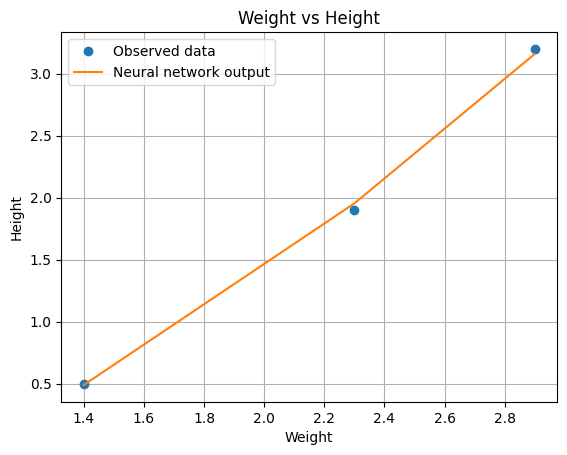

In [48]:
# Did it learn the function?
y_pred = forward_pass(x)

# Plot the data and the neural network output
plt.plot(weight.numpy(), height.numpy(), "o", label="Observed data")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight vs Height")
plt.grid(True)
plt.plot(weight.numpy(), y_pred.detach().numpy(), label="Neural network output")
plt.legend()
plt.show()